# 重要な特徴量を可視化

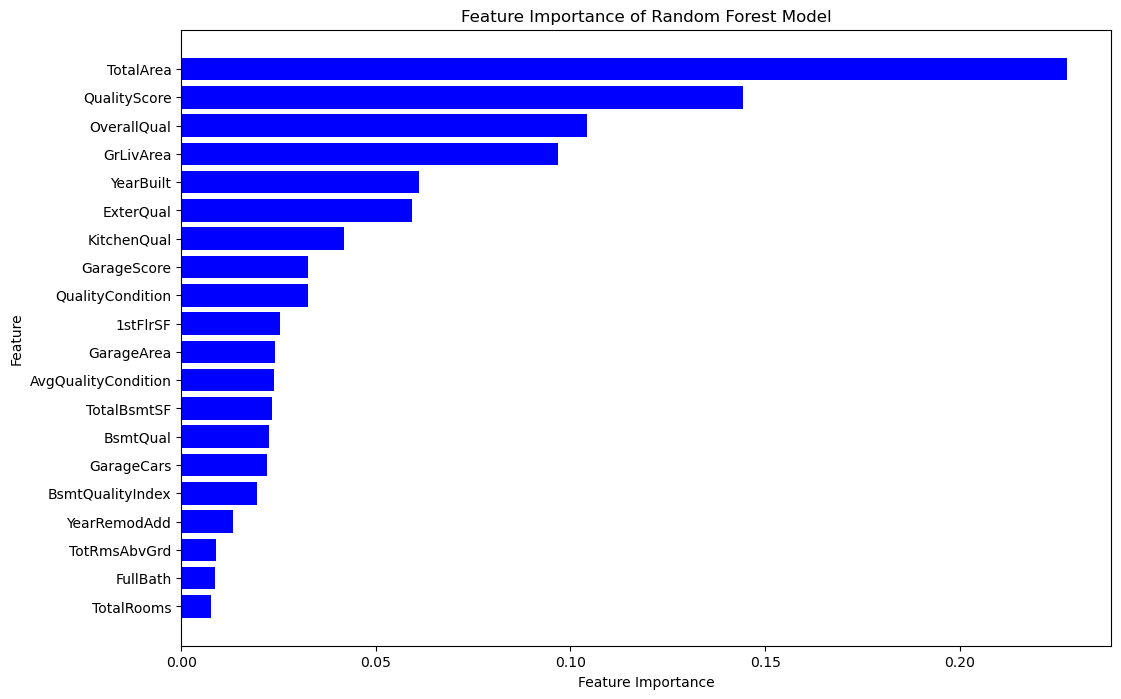

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# データの読み込み
data_path = '/Users/hayakawakazue/Downloads/house_price/train/train_preprocessed.csv'
data = pd.read_csv(data_path)

# 重要な特徴量のリスト
important_features = [
    'TotalArea', 'QualityScore', 'OverallQual', 'GrLivArea', 
    'GarageScore', 'ExterQual', 'KitchenQual', 
    'GarageCars', 'BsmtQual', 'GarageArea', 'TotalBsmtSF', 
    'BsmtQualityIndex', '1stFlrSF', 'AvgQualityCondition', 'QualityCondition',
    'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotalRooms', 'TotRmsAbvGrd'
]

# 特徴量と目的変数を分ける
X = data[important_features]
y = data['SalePrice']

# モデルの読み込み
model_path = '/Users/hayakawakazue/Downloads/house_price/model/random_forest_best.joblib'
model = joblib.load(model_path)

# 特徴量の重要度を取得
feature_importances = model.feature_importances_
features = X.columns

# 特徴量の重要度をデータフレームに変換
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 特徴量の重要度をプロット
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance of Random Forest Model')
plt.show()
